# OT-based image alignment

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.stats import multivariate_normal
from scipy.io import loadmat 

from otimage import readers, imagerep, imagereg
from otimage.utils import plot_maxproj

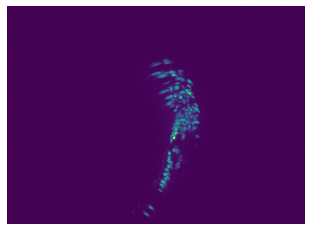

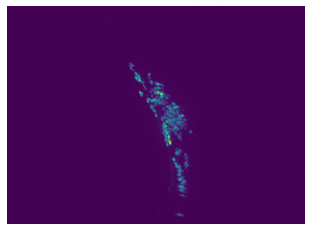

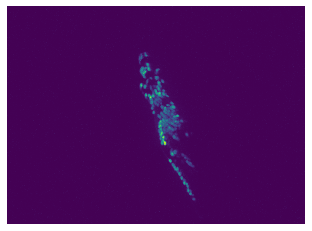

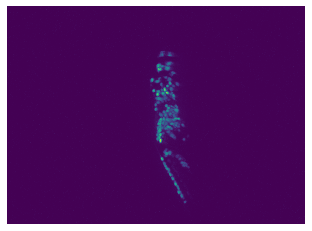

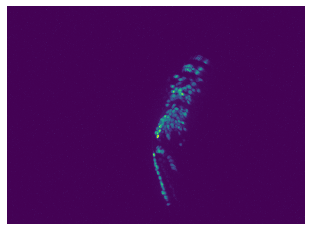

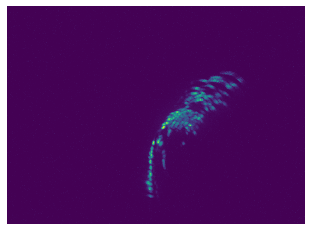

In [26]:
idx = range(2, 8)

img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
out_dir = '/home/mn2822/Desktop/WormOT/cosyne_figs'

with readers.ZimmerReader(img_path) as reader:
    
    for i in idx:
        
        img = reader.get_frame(i)
        plt.figure()
        plot_maxproj(img)
        plt.axis('off')
        plt.savefig(f'{out_dir}/frame_{i}.png')
        

In [23]:
# Select frames
t1 = 6
t2 = t1 + 1

# Load two successive frames from dataset
img_path = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
with readers.ZimmerReader(img_path) as reader:
    frame_1 = reader.get_frame(t1)
    frame_2 = reader.get_frame(t2)
    img_shape = frame_1.shape

# Load MP components
n_mps = 50
mp_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mp_components/mp_0000_0050.mat'
mp_data = loadmat(mp_path)
cov = mp_data['cov']
pts_1 = mp_data['means'][t1, 0:n_mps, :]
pts_2 = mp_data['means'][t2, 0:n_mps, :]
wts_1 = mp_data['weights'][t1, 0:n_mps, 0]
wts_2 = mp_data['weights'][t2, 0:n_mps, 0]

In [24]:
alpha, beta, _ = imagereg.ot_reg_linear(pts_1, pts_2, wts_1, wts_2)

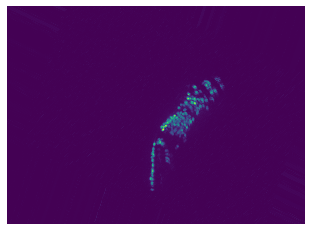

In [25]:
# Apply linear transform to first frame to reconstruct frame at time t
inv_beta = np.linalg.inv(beta)
inv_alpha = -inv_beta @ alpha
rec_img = affine_transform(frame_1, inv_beta, inv_alpha, mode='nearest')

# MP reconstruction
#rec_pts_t = reg_data['rec_pts'][t, :, :].astype(int)
#rec_img_t = imagerep.reconstruct_image(rec_pts_t, [cov], wts_0, img_shape)

#plt.figure(figsize=(15, 15))

#plt.subplot(131)
#plot_maxproj(frame_1)
#plt.title(f'frame {t1}')
#plt.axis('off')
        
#plt.subplot(132)
#plot_maxproj(frame_2)
#plt.title(f'frame {t2}')
#plt.axis('off')
        
#plt.subplot(133)
#plot_maxproj(rec_img)
#plt.title(f'frame {t2} (reconstruction)');
#plt.axis('off')

plt.figure()
plot_maxproj(rec_img)
plt.axis('off')
plt.savefig(f'{out_dir}/trans_{t1}_{t2}.png')